In [68]:
import pandahouse
import seaborn as sns
from causalimpact import CausalImpact

<font size=6>Предположите, какие метрики должны были измениться во время флэшмоба и как. Почему?</font>

- Самая очевидная метрика, которая увеличится это метрика количества постов, тк мы стимулируем людей выкладывать новые посты
- Многих людей заинтересует флешмоб, и они повысят свою активность, поэтому метрики, такие как: количество лайков, количество просмотров и количество действий(лайки+просмотры) увеличатся
- Возможно, если людям будет нравится тематика постов, а не только призы, которые они могут получить, то увеличится показатель ctr (Это будет означать, что посты флешмоба интереснее обычных постов)

In [69]:
connection = {'host': 'https://clickhouse.lab.karpov.courses',
'database':'simulator_20230820',
'user':'student',
'password':'dpo_python_2020'
}

In [70]:
q = """
SELECT count(distinct post_id) as posts,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    toDate(time) as Date
FROM {db}.feed_actions 
WHERE toDate(time) < today() - 1

GROUP BY toDate(time)
"""

df = pandahouse.read_clickhouse(q, connection=connection)

In [71]:
q = """
SELECT  
    countIf(user_id,action='like')/countIf(user_id,action='view') as ctr,
    toDate(time) as Date
FROM {db}.feed_actions 
WHERE toDate(time) < today() - 1
GROUP BY  toDate(time)
order by toDate(time)
"""

dfctr = pandahouse.read_clickhouse(q, connection=connection)



In [72]:
q = """
SELECT count(action) as count_action,
    toDate(time) as Date
FROM {db}.feed_actions 
WHERE toDate(time) < today() - 1
GROUP BY  toDate(time)
order by toDate(time)
"""

dfaction = pandahouse.read_clickhouse(q, connection=connection)

In [73]:
dfctr=dfctr[['ctr','Date']].copy()
dfctr.index=dfctr["Date"]
dfctr=dfctr.drop('Date',axis=1)

dfaction=dfaction[['count_action','Date']].copy()
dfaction.index=dfaction["Date"]
dfaction=dfaction.drop('Date',axis=1)


df1=df[['posts','Date']].copy()
df1.index=df1["Date"]
df1=df1.drop('Date',axis=1)

<h2>Посты</h2>

In [82]:
impact = CausalImpact(data=df1, #данные
                      pre_period=["2023-07-03","2023-08-12"], #период до события
                      post_period=["2023-08-13","2023-08-19"], #период после события
                    model_args={'nseasons': 7})
                

2023-09-10 09:54:20.048973: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-09-10 09:54:20.079027: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-09-10 09:54:21.068853: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-09-10 09:

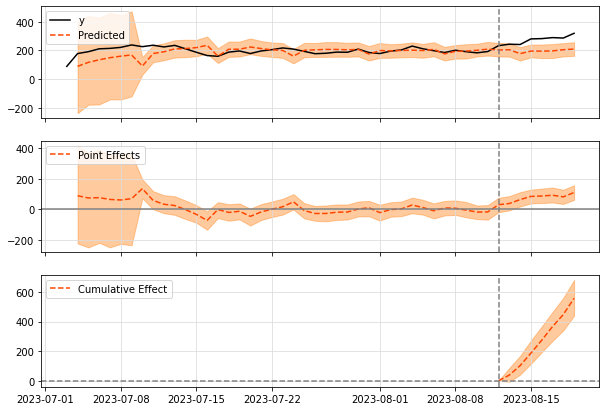

In [83]:
impact.plot()

In [84]:
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    277.14             1940.0
Prediction (s.d.)         197.54 (8.71)      1382.78 (60.94)
95% CI                    [181.14, 215.26]   [1267.98, 1506.85]

Absolute effect (s.d.)    79.6 (8.71)        557.22 (60.94)
95% CI                    [61.88, 96.0]      [433.15, 672.02]

Relative effect (s.d.)    40.3% (4.41%)      40.3% (4.41%)
95% CI                    [31.32%, 48.6%]    [31.32%, 48.6%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


<h3>CausalImpact показал увеличение метрики количества постов во время флешмоба. Метрика увеличилась на 40.3%</h3>

<h2>CTR</h2>

In [91]:
impactctr = CausalImpact(data=dfctr, #данные
                      pre_period=["2023-07-03","2023-08-12"], #период до события
                      post_period=["2023-08-13","2023-08-19"], #период после события
                    model_args={'nseasons': 7})

2023-09-10 09:55:55.734878: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-09-10 09:55:55.764625: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-09-10 09:55:56.769984: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-09-10 09:

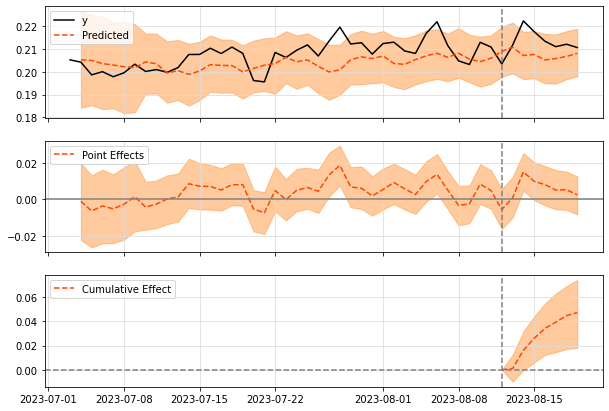

In [92]:
impactctr.plot()

In [93]:
print(impactctr.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    0.21               1.5
Prediction (s.d.)         0.21 (0.0)         1.45 (0.01)
95% CI                    [0.2, 0.21]        [1.42, 1.48]

Absolute effect (s.d.)    0.01 (0.0)         0.05 (0.01)
95% CI                    [0.0, 0.01]        [0.02, 0.08]

Relative effect (s.d.)    3.26% (1.0%)       3.26% (1.0%)
95% CI                    [1.29%, 5.22%]     [1.29%, 5.22%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 99.9%

For more details run the command: print(impact.summary('report'))


<h3>CausalImpact показал незначительное увеличение ctr во время флешмоба. Метрика увеличилась на 3.26%</h3>

<h2>Действия(action)</h2>

In [94]:
impactaction = CausalImpact(data=dfaction, #данные
                      pre_period=["2023-07-03","2023-08-12"], #период до события
                      post_period=["2023-08-13","2023-08-19"], #период после события
                    model_args={'nseasons': 7})

2023-09-10 09:56:31.653951: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-09-10 09:56:31.683295: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-09-10 09:56:32.673904: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-09-10 09:

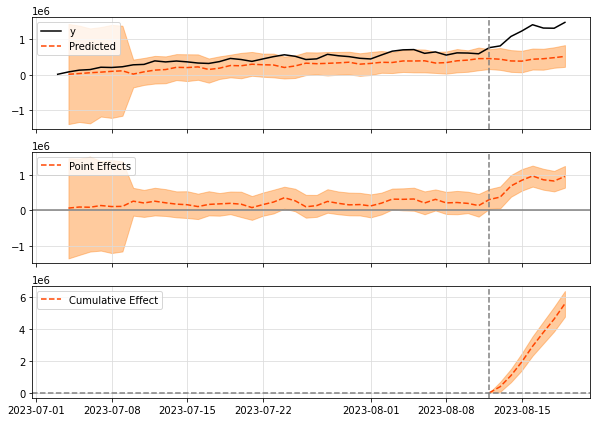

In [95]:
impactaction.plot()

In [96]:
print(impactaction.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    1238037.38         8666262.0
Prediction (s.d.)         441299.22 (58680.8)3089094.5 (410765.61)
95% CI                    [329544.17, 559568.72][2306809.22, 3916981.16]

Absolute effect (s.d.)    796738.12 (58680.8)5577167.5 (410765.61)
95% CI                    [678468.65, 908493.2][4749280.84, 6359452.78]

Relative effect (s.d.)    180.54% (13.3%)    180.54% (13.3%)
95% CI                    [153.74%, 205.87%] [153.74%, 205.87%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


<h3>CausalImpact показал увеличение количества действий во время флешмоба. Метрика увеличилась на 180.54%</h3>

<h2>Имел ли флэшмоб какие-то долгосрочные эффекты?</h2>

<h3>Посмотрим, есть ли долгосрочный эффект. Для этого уберем кусок данных с флешмобом и еще несколько дней до и после, также добавим данные за период от флешмоба до первых чисел сентября  </h3>

In [126]:
impactctr2 = CausalImpact(data=dfctr, #данные
                      pre_period=["2023-07-03","2023-08-10"], #период до события
                      post_period=["2023-08-22","2023-09-05"], #период после события
                    model_args={'nseasons': 7})

2023-09-10 10:25:23.652321: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-09-10 10:25:23.681359: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-09-10 10:25:24.636437: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-09-10 10:

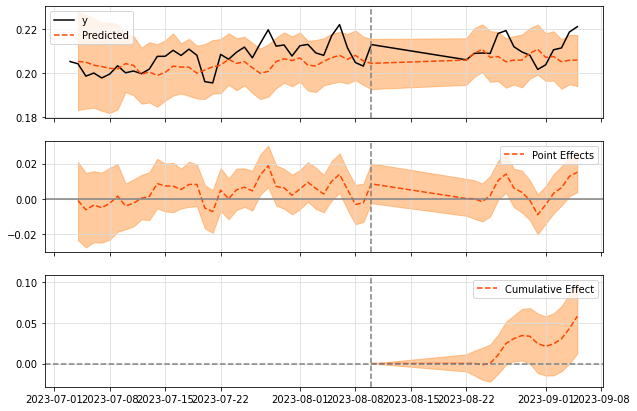

In [127]:
impactctr2.plot()

In [128]:
print(impactctr2.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    0.21               3.17
Prediction (s.d.)         0.21 (0.0)         3.11 (0.02)
95% CI                    [0.2, 0.21]        [3.06, 3.15]

Absolute effect (s.d.)    0.0 (0.0)          0.06 (0.02)
95% CI                    [0.0, 0.01]        [0.01, 0.11]

Relative effect (s.d.)    1.87% (0.79%)      1.87% (0.79%)
95% CI                    [0.35%, 3.46%]     [0.35%, 3.46%]

Posterior tail-area probability p: 0.01
Posterior prob. of a causal effect: 98.7%

For more details run the command: print(impact.summary('report'))


<h3>В долгосрочной перспективе CTR имеет незначительно увеличение на 1.87%. Видно, что p_value=0.01 те меньше 0.05 это говорит о том, что статистически значемые различия есть</h3>

In [138]:
impactaction2 = CausalImpact(data=dfaction, #данные
                      pre_period=["2023-07-10","2023-08-11"], #период до события
                      post_period=["2023-08-22","2023-09-05"], #период после события
                    model_args={'nseasons': 7})

2023-09-10 10:45:55.739857: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-09-10 10:45:55.769901: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-09-10 10:45:56.755498: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-09-10 10:

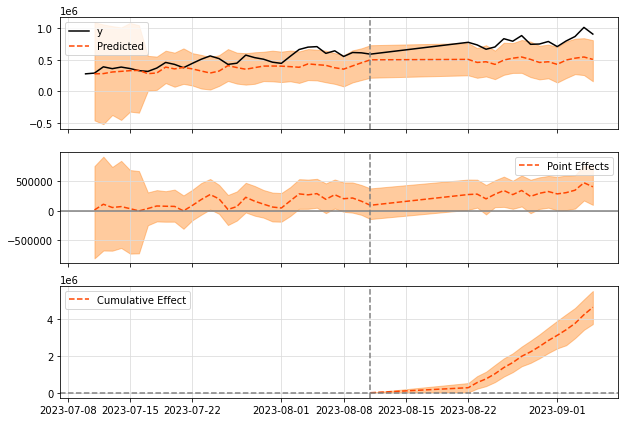

In [139]:
impactaction2.plot()

In [140]:
print(impactaction2.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    800340.94          12005114.0
Prediction (s.d.)         491440.06 (28761.36)7371601.0 (431420.52)
95% CI                    [435748.49, 548490.97][6536227.26, 8227364.96]

Absolute effect (s.d.)    308900.88 (28761.36)4633513.0 (431420.52)
95% CI                    [251849.96, 364592.45][3777749.04, 5468886.74]

Relative effect (s.d.)    62.86% (5.85%)     62.86% (5.85%)
95% CI                    [51.25%, 74.19%]   [51.25%, 74.19%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


<h3> В долгосрочной перспективе Causal Impact показал увеличение количества действий на 62.86%</h3>

In [132]:
impact2 = CausalImpact(data=df1, #данные
                      pre_period=["2023-07-03","2023-08-10"], #период до события
                      post_period=["2023-08-22","2023-09-05"], #период после события
                    model_args={'nseasons': 7})
                

2023-09-10 10:26:32.639659: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-09-10 10:26:32.669293: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-09-10 10:26:33.640916: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-09-10 10:

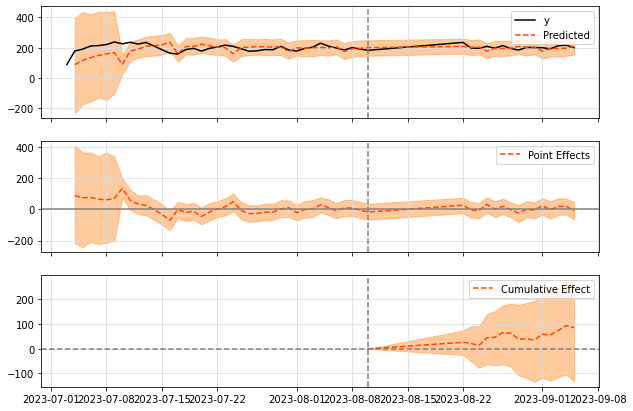

In [133]:
impact2.plot()

In [134]:
print(impact2.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    203.67             3055.0
Prediction (s.d.)         197.95 (6.71)      2969.32 (100.6)
95% CI                    [185.48, 211.77]   [2782.16, 3176.49]

Absolute effect (s.d.)    5.71 (6.71)        85.68 (100.6)
95% CI                    [-8.1, 18.19]      [-121.49, 272.84]

Relative effect (s.d.)    2.89% (3.39%)      2.89% (3.39%)
95% CI                    [-4.09%, 9.19%]    [-4.09%, 9.19%]

Posterior tail-area probability p: 0.19
Posterior prob. of a causal effect: 81.02%

For more details run the command: print(impact.summary('report'))


<h3> В долгосрочной перспективе Causal Impact показал увеличение количества постов на 2.89%, но p_value=0.19, данные нельзя считать статистически значемыми</h3>

<h2>Вывод:</h2>

<h4>Во время флешмоба:</h4>
Все три метрики показали увеличение во время флешмоба. CTR увеличился на 3.26%. Количество постов увеличилось на 40.3%.Количество действий увеличилось на 180.54%

<h4>В долгосрочной перспективе:</h4>

- СTR показал увеличение на 1.87%с доверительным интервалом [0.35%, 3.46%]
- Causal Impact не показал статистически значимых изменений метрики количества постов
- Количсетво действий увеличилось на 62.86% 
- В целом влияние флешмоба в долгосрочной перспективе практически несущественно за исключением метрики кольчества действий